In this notebook we implement the class to perform localization of the flies using the blob detector.

In [4]:
import cv2 as cv 
import numpy as np

from flytracker.components import Frame
from flytracker.utils import run_localization

import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

# Building a class

In [5]:
class BlobDetector:
    def __init__(self, params=None):
        if params is None:
            self.blob_detector = cv.SimpleBlobDetector_create(self.default_blob_detector_params)
        else:
            self.blob_detector = cv.SimpleBlobDetector_create(params)
    
    def __call__(self, image):
        keypoints = self.blob_detector.detect(image(gray=True, masked=True))
        coordinates = np.array([keypoint.pt for keypoint in keypoints])
        return coordinates
        
    @property
    def default_blob_detector_params(self):
        # Setup SimpleBlobDetector parameters.
        params = cv.SimpleBlobDetector_Params()

        # Change thresholds
        params.minThreshold = 20
        params.maxThreshold = 150

        # Filter by Area.
        params.filterByArea = True
        params.minArea = 15
        params.maxArea = 60
        params.minDistBetweenBlobs = 1.0

        # Turn off other filters
        params.filterByCircularity = False
        params.filterByConvexity = False
        params.filterByInertia = False

        return params

# Testing

In [8]:
%%time
coordinates = run_localization(200)

CPU times: user 3.26 s, sys: 348 ms, total: 3.61 s
Wall time: 1.8 s


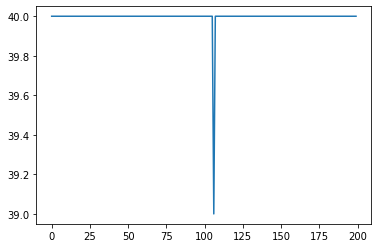

In [9]:
plt.plot([fly_coordinates.shape[0] for fly_coordinates in coordinates])

So it's correct for all first 100 frames!